# Detect and track LKFs in netcdf model output

This tutorial shows how to generate a LKF data-set based on gridded RGPS sea-ice drift and deformation data in netcdf format. 

**Warning:** The data used in this tutorial is a preprocessed version of RGPS data that is not publicly available anymore. The distribution of the RGPS data has moved to the Alaska Satellite Facility and is available in a different format here: https://asf.alaska.edu/data-sets/derived-data-sets/seaice-measures/sea-ice-measures-data-products/. Updating this notebook to the new data formar is in progress.  
   
### Load `lkf_tools` package

In [1]:
%load_ext autoreload
%autoreload 2

import xarray as xr
import os
from pathlib import Path
from lkf_tools.dataset import *

### Open netcdf file

We open the netcdf file with xarray. As an example we use here winter 2000/2001.

In [2]:
data_path = Path('../../RGPS/eulerian/netcdfs/RGPS_eulerian_drift_deformation_w0001.nc')

rgps_nc = xr.open_dataset(data_path)

### Processing netcdf file

Since the RGPS netcdf file does not follow the conventions of `lkf_tools` package, we need to rename some variables and coordinates.

In [3]:
rgps_nc = rgps_nc.rename({'xc':'x', 'yc':'y', 'divergence':'div', 'shear':'shr',
                          'vorticity':'vor', 'u':'U', 'v':'V', 'lon':'ULON', 'lat':'ULAT'})
rgps_nc = rgps_nc.assign(A=np.isfinite(rgps_nc.div).astype('float'))
rgps_nc

<xarray.Dataset>
Dimensions:     (time: 60, y: 248, x: 264)
Coordinates:
    ULON        (y, x) float64 ...
    ULAT        (y, x) float64 ...
  * x           (x) float64 -2.294e+06 -2.281e+06 ... 9.812e+05 9.938e+05
  * y           (y) float64 -9.938e+05 -9.812e+05 ... 2.081e+06 2.094e+06
  * time        (time) datetime64[ns] 2000-11-11T12:00:00 ... 2001-05-07T12:0...
    start_time  (time) datetime64[ns] ...
    end_time    (time) datetime64[ns] ...
Data variables:
    div         (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    shr         (time, y, x) float32 ...
    vor         (time, y, x) float32 ...
    U           (time, y, x) float64 ...
    V           (time, y, x) float64 ...
    A           (time, y, x) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes: (12/21)
    title:                  RADARSAT Geophysical Processing System: Eulerian ...
    summary:                Eulerian sea ice deformation and drift data inter...
    keywords:               sea ice; deformation; divergence; shear; vorticit...
    Conventions:            ACDD-1.3
    id:                     w0001
    instrument:             RADARSAT
    ...                     ...
    geospatial_lat_max:     89.91949435184777
    geospatial_lon_min:     -180.0
    geospatial_lon_max:     179.82845626253842
    time_coverage_start:    2000-11-10T00:00:00
    time_coverage_end:      2001-05-09T00:00:00
    metadata_link:          https://asf.alaska.edu/wp-content/uploads/2019/03...

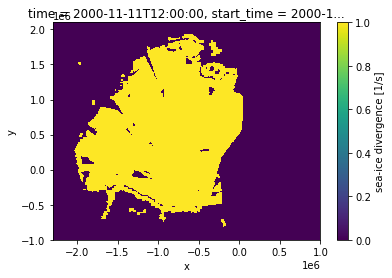

In [4]:
rgps_nc.A[0,:,:].plot()

### Open a new processing object
This step initiates a lkf processing object that reads in the netcdf files and sets everything up to run the detection and processing steps.

In [5]:
lkf_data = process_dataset(data_path,
                           output_path='../data/lkfs/RGPS/w0001/',
                           xarray=rgps_nc,t_red=1)

  -->  Compute dxu and dyu from lon,lat using SSMI projection


### Detection of LKFs
After initialising the lkf processing object, we run the detection step. If `indexes` is defined only those specific time steps will be detected. Here we just detect the first two days for demonstration purposes.

*Note: the algorithms currently outputs a number of warnings, that can be ignored mostly. It is an open issue to remove those warnings.*

In [6]:
lkf_data.detect_lkfs(indexes=[0,1])

Compute deformation rates and detect features for day 1
Start detection routines


/Users/nhutter/Documents/Research/lkf_tools/lkf_tools/detection.py:97: RuntimeWarning: invalid value encountered in true_divide
  gaussian_field = field_nonnan_f/mask_nan_f
/Users/nhutter/Documents/Research/lkf_tools/lkf_tools/detection.py:1148: RuntimeWarning: Mean of empty slice
  eps_tot = np.nanmean(np.stack(eps_tot),axis=0)
/Users/nhutter/Documents/Research/lkf_tools/lkf_tools/detection.py:248: RuntimeWarning: invalid value encountered in true_divide
  dx = (seg_active[:,:,-1]-seg_active[np.arange(seg_active.shape[0]),:,-num_points])/np.stack([num_points-1,num_points-1],axis=1) - (seg_append-seg_active[:,:,-1])
/Users/nhutter/Documents/Research/lkf_tools/lkf_tools/detection.py:559: RuntimeWarning: invalid value encountered in true_divide
  e1 = (e1/np.sqrt(np.sum(e1**2))) # Normalize basis vector
/Users/nhutter/Documents/Research/lkf_tools/lkf_tools/detection.py:562: RuntimeWarning: invalid value encountered in true_divide
  f1 = (f1/np.sqrt(np.sum(f1**2))) # Normalize basis vecto

Compute deformation rates and detect features for day 2
Start detection routines


/Users/nhutter/Documents/Research/lkf_tools/lkf_tools/detection.py:1167: RuntimeWarning: divide by zero encountered in log10
  eps_mn = compute_mn_eps(np.log10(eps_tot),seg)
/Users/nhutter/Documents/Research/lkf_tools/lkf_tools/detection.py:1176: RuntimeWarning: divide by zero encountered in log10
  eps_mn = compute_mn_eps(np.log10(eps_tot),seg)
/Users/nhutter/Documents/Research/lkf_tools/lkf_tools/detection.py:562: RuntimeWarning: invalid value encountered in true_divide
  f1 = (f1/np.sqrt(np.sum(f1**2))) # Normalize basis vector
/Users/nhutter/Documents/Research/lkf_tools/lkf_tools/detection.py:559: RuntimeWarning: invalid value encountered in true_divide
  e1 = (e1/np.sqrt(np.sum(e1**2))) # Normalize basis vector
/Users/nhutter/miniforge3/envs/lkf_tools/lib/python3.10/site-packages/numpy/lib/npyio.py:518: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated

Now we can have a short look at the outcome of the detection. We will plot the LKFs detected in the last time step over the deformation rates.

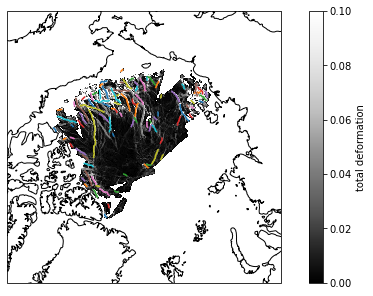

In [7]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig = plt.figure(figsize=[10, 5])

ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))

ax.coastlines(zorder=3)

pcm = ax.pcolormesh(lkf_data.lon[max([0,lkf_data.index_y[0][0]-1]):lkf_data.index_y[0][-1]+2:lkf_data.red_fac,
                       max([0,lkf_data.index_x[0][0]-1]):lkf_data.index_x[0][-1]+2:lkf_data.red_fac],
              lkf_data.lat[max([0,lkf_data.index_y[0][0]-1]):lkf_data.index_y[0][-1]+2:lkf_data.red_fac,
                       max([0,lkf_data.index_x[0][0]-1]):lkf_data.index_x[0][-1]+2:lkf_data.red_fac],
              np.sum(lkf_data.eps_tot_list,axis=0),transform=ccrs.PlateCarree(),vmin=0,vmax=1e-1,cmap='Greys_r')

it = lkf_data.indexes[-1]

#lkfs = np.load(lkf_data.lkfpath.joinpath('lkf_McGill_runno01_expno07_1997_daily_means_029.npy'),allow_pickle=True)
lkfs = np.load(lkf_data.lkfpath.joinpath('lkf_%s_%03i.npy' %(lkf_data.netcdf_file.split('/')[-1].split('.')[0],(it+1))),allow_pickle=True)

for ilkf in lkfs:
    if np.min(ilkf[:,2])<-150 and np.max(ilkf[:,2]>150):
        ilkf[ilkf[:,2]<0,2]+=360
    ax.plot(ilkf[:,2],ilkf[:,3],transform=ccrs.PlateCarree())

plt.colorbar(pcm,label='total deformation')

### Track LKFs

After detecting LKFs, we can track LKFs using the drift fields to advect features. Since we only detected two time steps, we can just track the first pair, which we define with `indexes` again.

In [8]:
lkf_data.track_lkfs(indexes=[0])

After tracking the features, we will plot the tracked results to see if it worked appropriately.

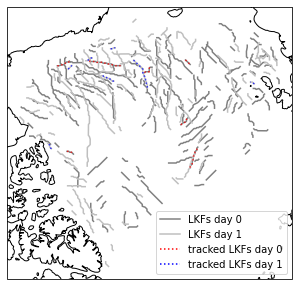

In [9]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig = plt.figure(figsize=[10, 5])

ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))

ax.coastlines(zorder=3)

it = 0

lkfs0 = np.load(lkf_data.lkfpath.joinpath('lkf_%s_%03i.npy' %(lkf_data.netcdf_file.split('/')[-1].split('.')[0],(it+1))),allow_pickle=True)
lkfs1 = np.load(lkf_data.lkfpath.joinpath('lkf_%s_%03i.npy' %(lkf_data.netcdf_file.split('/')[-1].split('.')[0],(it+2))),allow_pickle=True)

tracks = np.load(lkf_data.track_output_path.joinpath('lkf_tracked_pairs_%s_to_%s.npy' %(lkf_data.lkf_filelist[it][4:-4],
                                                                                        lkf_data.lkf_filelist[it+1][4:-4])),allow_pickle=True)

for ilkf in lkfs0:
    if np.min(ilkf[:,2])<-150 and np.max(ilkf[:,2]>150):
        ilkf[ilkf[:,2]<0,2]+=360
    ax.plot(ilkf[:,2],ilkf[:,3],'0.5',transform=ccrs.PlateCarree())
    
for ilkf in lkfs1:
    if np.min(ilkf[:,2])<-150 and np.max(ilkf[:,2]>150):
        ilkf[ilkf[:,2]<0,2]+=360
    ax.plot(ilkf[:,2],ilkf[:,3],'0.75',transform=ccrs.PlateCarree())

for itrack in tracks:
    ax.plot(lkfs0[itrack[0]][:,2],lkfs0[itrack[0]][:,3],'r:',alpha=0.75,transform=ccrs.PlateCarree())
    ax.plot(lkfs1[itrack[1]][:,2],lkfs1[itrack[1]][:,3],'b:',alpha=0.75,transform=ccrs.PlateCarree())
    
ax.plot([0,0],[0,0],'0.5',label='LKFs day 0')
ax.plot([0,0],[0,0],'0.75',label='LKFs day 1')
ax.plot([0,0],[0,0],'r:',label='tracked LKFs day 0')
ax.plot([0,0],[0,0],'b:',label='tracked LKFs day 1')

ax.legend()